In [2]:
from run import Runner
from mytorch.utils.goodies import FancyDict
from matplotlib import pyplot as plt
import numpy as np
import torch

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
args = {'name' : 'testrun',
'dataset' : 'RLF/lf',
'model' : 'compgcn',
'score_func' : 'conve',
'opn' : 'corr',                 
'use_wandb' : False, 
'batch_size' : 128,       
'gamma' : 40.0,			
'gpu' : '-1',			
'max_epochs' : 1,  	
'l2' : 0.0,			
'lr' : 0.001,			
'lbl_smooth' : 0.1,	
'num_workers' : 10,                     
'seed' : 41504,     	
'restore' : False,            
'bias' : False   ,         
'num_bases' : -1, 	
'init_dim' : 100,	
'gcn_dim' : 200 ,	
'embed_dim' : None, 	
'gcn_layer' : 1 	,
'dropout' : 0.1	,
'hid_drop' : 0.3	,
'hid_drop2' : 0.3	,
'feat_drop' : 0.3	,
'k_w' : 10 	,
'k_h' : 20 	,
'num_filt' : 200, 	
'ker_sz' : 7 	,
'log_dir' : './log/',               
'config_dir' : './config/',
'trim': False,
'trim_ratio': 0.00005,
'use_fasttext': False
}
args = FancyDict(args)

model = Runner(args)

2023-07-21 09:39:12,595 - [INFO] - {}
{}


In [4]:
model.p.num_ent

26558

In [5]:
! free -h

               total       utilisé      libre     partagé tamp/cache   disponible
Mem:            62Gi       4,0Gi        43Gi       1,1Gi        13Gi        56Gi
Partition d'échange:      1,9Gi          0B       1,9Gi


In [7]:
# # Now load the saved model
model.load_model('./checkpoints/compgcn-conve-rlffam')

In [8]:
model.ent2id['soleil i.a'] # Voila ca marche

1436

In [9]:
model.id2ent[11056]

'poliment'

In [10]:
sub = 'Maria Callas'
rel = 'r_syn'

In [11]:
def visualize_predictions(model, sub: str, rel: str, n: int):
    # Note model here is runner object
    
    # Let's get their IDs
    id_sub, id_rel = model.ent2id[sub], model.rel2id[rel]
    # Convert them to torch tensors of shape (2,1)
    t_sub = torch.tensor([id_sub, id_sub])
    t_rel = torch.tensor([id_rel, id_rel])
    
    # Get the model output
    with torch.no_grad():
        model.model.eval()
        pred = model.model.forward(t_sub, t_rel)

    output = pred[0]
    print(len(output))
    
    # Argsort and get predictions
    predicted_nodes = torch.argsort(output, descending=True)[:n]
    predicted_scores = output[predicted_nodes]

    # Get label of predicted nodes
    predicted_node_names = [model.id2ent[nodeid.item()] for nodeid in predicted_nodes]
    
    # Plot them, and return values
    plt.bar(predicted_node_names, predicted_scores)
    _ = plt.xticks(rotation=90)
    
    return {
        'ids': predicted_nodes,
        'names': predicted_node_names,
        'scores': predicted_scores
    }

26558


{'ids': tensor([  177,  8421, 14822,  7826, 14950,  3732, 17461, 17817,   178, 20067,
         24833, 14818,  8317,   550,  9278,     4,  8846, 11740, 17843,  6375]),
 'names': ['orage i',
  'bruine',
  'mauvais temps i',
  'cordes iv',
  'intempéries',
  'crachin',
  'drache',
  'flotte ii',
  'averse i',
  'grain iv',
  'giboulée',
  'sauce ii',
  'saucée',
  'nuage i',
  'rincée',
  'pluie i',
  'déluge i',
  'pleuvoir i',
  'pluvieux',
  'cataracte ii'],
 'scores': tensor([0.9680, 0.9368, 0.9253, 0.9130, 0.8797, 0.8756, 0.8703, 0.8626, 0.7243,
         0.7116, 0.6928, 0.5131, 0.5051, 0.4626, 0.4575, 0.3584, 0.3324, 0.1263,
         0.1008, 0.0834])}

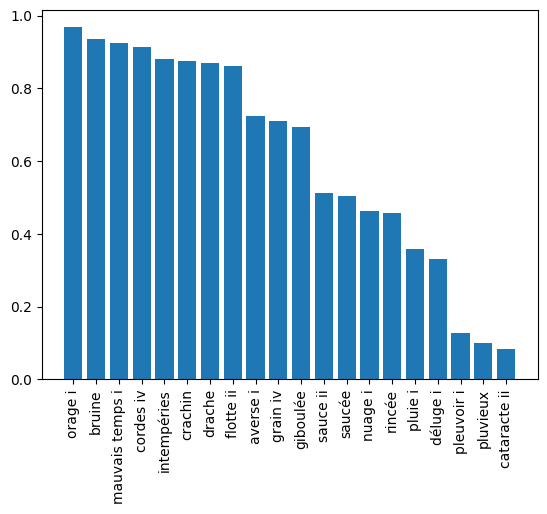

In [13]:
visualize_predictions(model, 'pluie i', 'syn', n = 20)